In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy #.stats.tukey_hsd

In [51]:
import pickle

def save_pickle(filename, file):
    filehandler = open(filename, "wb")
    pickle.dump(file, filehandler)
    filehandler.close()

def load_pickle(filename):
    file = open(filename,'rb')
    object_file = pickle.load(file)
    file.close()
    return file

In [52]:
data_path = "../problem_merged_data.csv"
df = pd.read_csv(data_path)
len(df)

1682

In [86]:
df = df.fillna(value="UNK")

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   group            1682 non-null   int64  
 1   item             1682 non-null   int64  
 2   channel          1682 non-null   object 
 3   date             1682 non-null   object 
 4   bid              1682 non-null   float64
 5   budget           1682 non-null   float64
 6   engagements      1682 non-null   int64  
 7   page_views       1682 non-null   int64  
 8   clicks           1682 non-null   int64  
 9   active_days      1682 non-null   int64  
 10  media_spend      1682 non-null   float64
 11  media_cpc        1682 non-null   float64
 12  cpe              1682 non-null   float64
 13  headline         1682 non-null   object 
 14  storySummary     1682 non-null   object 
 15  IABCategory      1682 non-null   object 
 16  targetGeo        1682 non-null   object 
 17  targetInterest

In [88]:
df.head(2)

,group,item,channel,date,bid,budget,engagements,page_views,clicks,active_days,...,storySummary,IABCategory,targetGeo,targetInterest,targetAge,targetOs,targetDevices,targetGender,targetLanguages,CATEGORY_1
0,37,997,YAHOO,2021-12-21,0.263696,660.923913,138,388,411,4,...,Peace of Mind with AAA Roadside Service. Join ...,Travel,"{""channelId"":""YAHOO"",""channelName"":""Yahoo"",""re...",UNK,UNK,UNK,UNK,UNK,UNK,UNK
1,37,1372,YAHOO,2021-12-21,0.263043,235.217391,80,253,270,4,...,Peace of Mind with AAA Roadside Service. Join ...,Travel,"{""channelId"":""YAHOO"",""channelName"":""Yahoo"",""re...",UNK,UNK,UNK,UNK,UNK,UNK,UNK


In [89]:
set(df['IABCategory'])

{'Business and Finance', 'Medical Health', 'News and Politics', 'Travel'}

In [90]:
_dict_df = df.to_dict(orient='index')
item = _dict_df[0]

In [91]:
item

{'group': 37,
 'item': 997,
 'channel': 'YAHOO',
 'date': '2021-12-21',
 'bid': 0.2636956521739129,
 'budget': 660.9239130434783,
 'engagements': 138,
 'page_views': 388,
 'clicks': 411,
 'active_days': 4,
 'media_spend': 158.31,
 'media_cpc': 0.39,
 'cpe': 1.1471738953521289,
 'headline': 'Get Valuable Discounts with AAA. Join for 50% Off',
 'storySummary': 'Peace of Mind with AAA Roadside Service. Join today with this limited time offer and get 50% your membership. ',
 'IABCategory': 'Travel',
 'targetGeo': '{"channelId":"YAHOO","channelName":"Yahoo","regionId":"24700964","regionName":"Baltimore, MD","countryId":"US","countryName":"United States","dmaCode":"512","geoType":"DMA","hash":"1384058325"};{"channelId":"YAHOO","channelName":"Yahoo","regionId":"24700992","regionName":"Cincinnati, OH","countryId":"US","countryName":"United States","dmaCode":"515","geoType":"DMA","hash":"1335126899"};{"channelId":"YAHOO","channelName":"Yahoo","regionId":"24701095","regionName":"Philadelphia, PA

### Qualitative Analysis

In [92]:
QUALI_KEYS = ['group',
              'item',
              'channel',
              'date',
              'headline',
              'storySummary',
              'IABCategory',
              'targetGeo',
              'targetInterest',
              'targetAge',
              'targetOs', 
              'targetDevices', 
              'targetGender', 
              'targetLanguages', 
              'CATEGORY_1']

KPI_KEY = 'cpe'

SECONDARY_KEYS = ['media_spend', 'engagements']

In [108]:
#VISUAL_KEY = KPI_KEY
#VISUAL_KEY = SECONDARY_KEYS[0]
VISUAL_KEY = SECONDARY_KEYS[1]

print(f"\nChecking {VISUAL_KEY.upper()} (!)\n")


Checking ENGAGEMENTS (!)



In [109]:
# Define sets within each item
dict_sets = {}

for _key in QUALI_KEYS:
    dict_sets[_key] = list(set(df[_key]))
    num_set = len(dict_sets[_key])
    
    # print(f"{_key.upper()}  |  UNIQ VALUES: {num_set}  |  SAMPLE: {_set[0]} \n")
    print(f"{_key.upper()}  |  UNIQ VALUES: {num_set} ")

GROUP  |  UNIQ VALUES: 10 
ITEM  |  UNIQ VALUES: 157 
CHANNEL  |  UNIQ VALUES: 3 
DATE  |  UNIQ VALUES: 358 
HEADLINE  |  UNIQ VALUES: 68 
STORYSUMMARY  |  UNIQ VALUES: 35 
IABCATEGORY  |  UNIQ VALUES: 4 
TARGETGEO  |  UNIQ VALUES: 16 
TARGETINTEREST  |  UNIQ VALUES: 25 
TARGETAGE  |  UNIQ VALUES: 5 
TARGETOS  |  UNIQ VALUES: 3 
TARGETDEVICES  |  UNIQ VALUES: 2 
TARGETGENDER  |  UNIQ VALUES: 3 
TARGETLANGUAGES  |  UNIQ VALUES: 2 
CATEGORY_1  |  UNIQ VALUES: 8 


In [110]:
SMALL_SET_KEYS = ['group', 'channel', 'IABCategory', 'targetAge', 'targetOs', 
                  'targetDevices', 'targetGender', 'targetLanguages', 'CATEGORY_1']

BIG_SET_KEYS = ['item', 'headline', 'storySummary']

MULTI_DIM_KEYS = ['date', 'targetInterest', 'targetGeo']

#### SMALL SET KEYS

In [111]:
print(SMALL_SET_KEYS, len(SMALL_SET_KEYS))

['group', 'channel', 'IABCategory', 'targetAge', 'targetOs', 'targetDevices', 'targetGender', 'targetLanguages', 'CATEGORY_1'] 9


In [112]:
# Get KEYs x KPI values
dict_key_set_data = {_single_key:{} for _single_key in SMALL_SET_KEYS}

for _single_key in SMALL_SET_KEYS:
    df_split = df[[_single_key, VISUAL_KEY]]
    
    for _uniq_val in dict_sets[_single_key]:
        #_query = f"{_single_key} == {_uniq_val}"
        #dict_key_set_data[_single_key][_uniq_val] = list(df_split.query(_query)[KPI_KEY])
        
        dict_key_set_data[_single_key][_uniq_val] = list(df_split[df_split[_single_key] == _uniq_val][VISUAL_KEY])

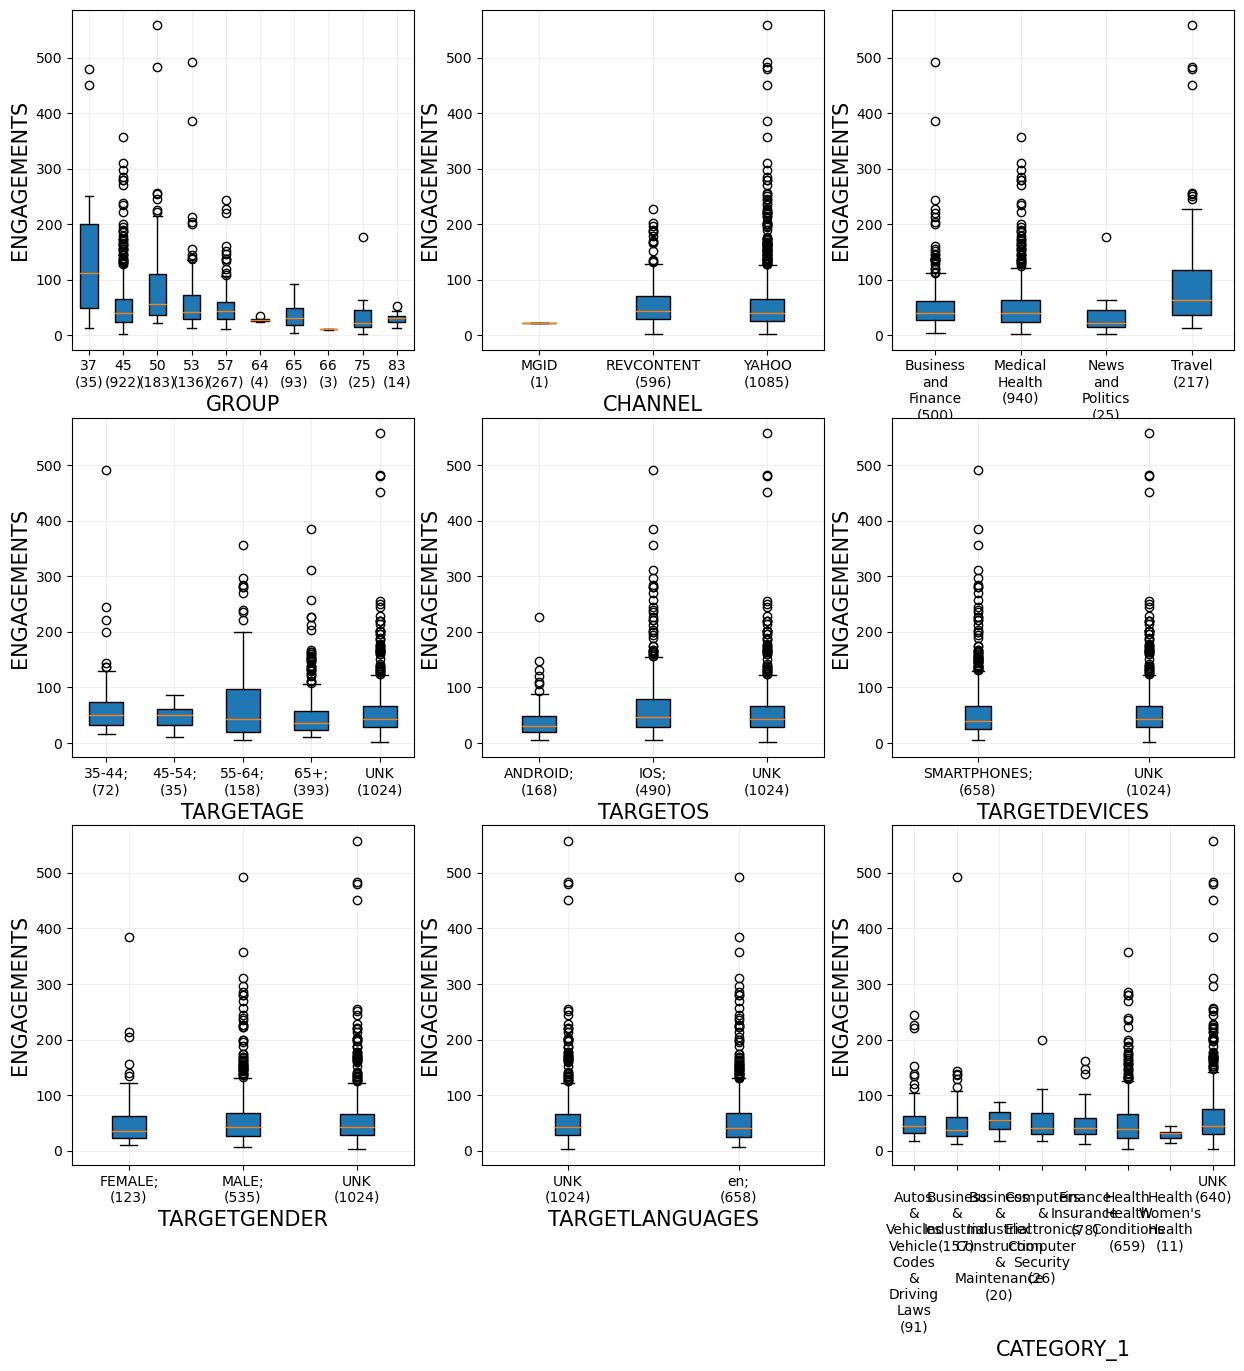

In [113]:
# Gather Data and Plot
dict_boxplot_data_small = {}

plt.figure(figsize=(15,15))
for idx, _single_key in enumerate(SMALL_SET_KEYS):
#for idx, _single_key in enumerate(["group", 'targetAge', 'IABCategory']):
    boxplot_data = []
    labels = []
    
    try:
        sorted_keys = sorted(dict_key_set_data[_single_key].keys())
    except:
        sorted_keys = dict_key_set_data[_single_key].keys()
    
    
    for _uniq_val in sorted_keys:
        boxplot_data.append(dict_key_set_data[_single_key][_uniq_val])
        labels.append(f"{_uniq_val}\n({len(boxplot_data[-1])})".replace('/','\n').replace(' ','\n'))
    
    plt.subplot(3,3,idx+1)
    test = plt.boxplot(boxplot_data, labels=labels, patch_artist=True)
    plt.grid(which='major', alpha=0.2)

    plt.ylabel(VISUAL_KEY.upper(), fontsize=15)
    plt.xlabel(_single_key.upper(), fontsize=15)
    
    dict_boxplot_data_small[_single_key] = boxplot_data

plt.savefig(f'imgs/boxplot_{VISUAL_KEY}_small_set_keys.pdf')
save_pickle(f'aux_data/dict_boxplot_{VISUAL_KEY}_data_small.pkl', dict_boxplot_data_small)

##### Visual Inspection - to - Tukey

In [114]:
_key = "channel" 
results = scipy.stats.tukey_hsd(dict_boxplot_data_small[_key][1],
                                dict_boxplot_data_small[_key][2])
print(f"{_key.upper()}\n")
print(results)

CHANNEL

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -5.143     0.041   -10.084    -0.203
 (1 - 0)      5.143     0.041     0.203    10.084



In [115]:
_key = "IABCategory" 
results = scipy.stats.tukey_hsd(dict_boxplot_data_small[_key][0],
                                dict_boxplot_data_small[_key][1],
                                dict_boxplot_data_small[_key][2],
                                dict_boxplot_data_small[_key][3])
print(f"{_key.upper()}\n")
print(results)

IABCATEGORY

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.044     1.000    -6.725     6.813
 (0 - 2)     17.780     0.262    -7.282    42.842
 (0 - 3)    -39.987     0.000   -49.928   -30.046
 (1 - 0)     -0.044     1.000    -6.813     6.725
 (1 - 2)     17.736     0.255    -7.045    42.517
 (1 - 3)    -40.031     0.000   -49.241   -30.821
 (2 - 0)    -17.780     0.262   -42.842     7.282
 (2 - 1)    -17.736     0.255   -42.517     7.045
 (2 - 3)    -57.767     0.000   -83.595   -31.939
 (3 - 0)     39.987     0.000    30.046    49.928
 (3 - 1)     40.031     0.000    30.821    49.241
 (3 - 2)     57.767     0.000    31.939    83.595



In [116]:
_key = "targetAge" 
results = scipy.stats.tukey_hsd(dict_boxplot_data_small[_key][0],
                                dict_boxplot_data_small[_key][1],
                                dict_boxplot_data_small[_key][2],
                                dict_boxplot_data_small[_key][3])
print(f"{_key.upper()}\n")
print(results)

TARGETAGE

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     20.698     0.236    -7.617    49.014
 (0 - 2)     -1.577     0.997   -21.116    17.962
 (0 - 3)     18.886     0.030     1.271    36.502
 (1 - 0)    -20.698     0.236   -49.014     7.617
 (1 - 2)    -22.276     0.115   -47.947     3.396
 (1 - 3)     -1.812     0.997   -26.052    22.428
 (2 - 0)      1.577     0.997   -17.962    21.116
 (2 - 1)     22.276     0.115    -3.396    47.947
 (2 - 3)     20.464     0.000     7.519    33.408
 (3 - 0)    -18.886     0.030   -36.502    -1.271
 (3 - 1)      1.812     0.997   -22.428    26.052
 (3 - 2)    -20.464     0.000   -33.408    -7.519



In [117]:
_key = "targetOs" 
results = scipy.stats.tukey_hsd(dict_boxplot_data_small[_key][0],
                                dict_boxplot_data_small[_key][1])
print(f"{_key.upper()}\n")
print(results)

TARGETOS

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -26.233     0.000   -35.521   -16.945
 (1 - 0)     26.233     0.000    16.945    35.521



In [118]:
_key = "targetGender" 
results = scipy.stats.tukey_hsd(dict_boxplot_data_small[_key][0],
                                dict_boxplot_data_small[_key][1])
print(f"{_key.upper()}\n")
print(results)

TARGETGENDER

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -8.150     0.132   -18.760     2.461
 (1 - 0)      8.150     0.132    -2.461    18.760



In [120]:
_key = "CATEGORY_1" 
results = scipy.stats.tukey_hsd(dict_boxplot_data_small[_key][0],
                                dict_boxplot_data_small[_key][1],
                                dict_boxplot_data_small[_key][3],
                                dict_boxplot_data_small[_key][4],
                                dict_boxplot_data_small[_key][5],
                                dict_boxplot_data_small[_key][6])
print(f"{_key.upper()}\n")
print(results)

CATEGORY_1

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      8.693     0.617    -7.087    24.473
 (0 - 2)      4.599     0.996   -22.035    31.233
 (0 - 3)      9.881     0.647    -8.600    28.362
 (0 - 4)      5.806     0.818    -7.588    19.200
 (0 - 5)     27.770     0.302   -10.462    66.002
 (1 - 0)     -8.693     0.617   -24.473     7.087
 (1 - 2)     -4.094     0.997   -29.453    21.265
 (1 - 3)      1.188     1.000   -15.404    17.779
 (1 - 4)     -2.888     0.972   -13.524     7.749
 (1 - 5)     19.077     0.691   -18.278    56.432
 (2 - 0)     -4.599     0.996   -31.233    22.035
 (2 - 1)      4.094     0.997   -21.265    29.453
 (2 - 3)      5.282     0.994   -21.840    32.404
 (2 - 4)      1.207     1.000   -22.741    25.154
 (2 - 5)     23.171     0.641   -19.907    66.250
 (3 - 0)     -9.881     0.647   -28.362     8.600
 (3 - 1)     -1.188     1.000   -17.779    15.404
 (3 - 2)     -5.282 

#### BIG SET KEYS

In [121]:
print(BIG_SET_KEYS)

FILTER_BIG = 10

['item', 'headline', 'storySummary']


In [122]:
# Get KEYs x KPI values
dict_key_set_data = {_single_key:{} for _single_key in BIG_SET_KEYS}

for _single_key in BIG_SET_KEYS:
    df_split = df[[_single_key, VISUAL_KEY]]
    
    for _uniq_val in dict_sets[_single_key]:
        #_query = f"{_single_key} == {_uniq_val}"
        #dict_key_set_data[_single_key][_uniq_val] = list(df_split.query(_query)[KPI_KEY])
        
        dict_key_set_data[_single_key][_uniq_val] = list(df_split[df_split[_single_key] == _uniq_val][VISUAL_KEY])

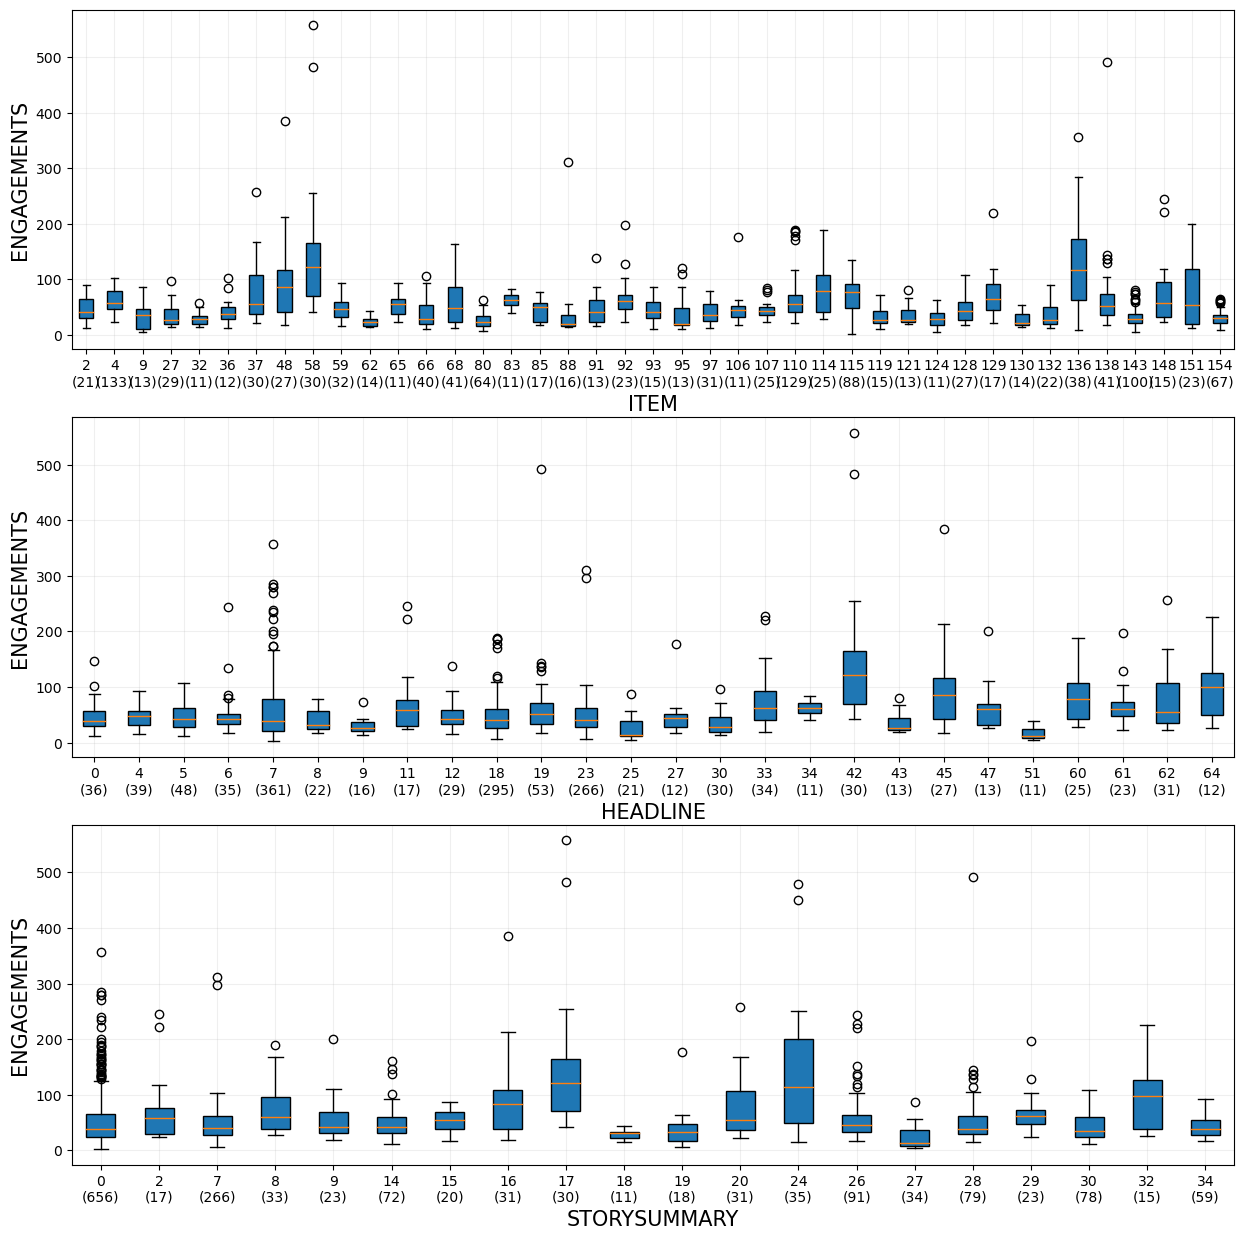

In [123]:
# Gather Data and Plot
dict_boxplot_data_big = {}

plt.figure(figsize=(15,15))
for ii, _single_key in enumerate(BIG_SET_KEYS):
    boxplot_data = []
    labels = []
    
    try:
        sorted_keys = sorted(dict_key_set_data[_single_key].keys())
    except:
        sorted_keys = dict_key_set_data[_single_key].keys()
    
    
    for idx, _uniq_val in enumerate(sorted_keys):
        if len(dict_key_set_data[_single_key][_uniq_val]) > FILTER_BIG:
            boxplot_data.append(dict_key_set_data[_single_key][_uniq_val])
            #labels.append(f"{_uniq_val}\n({len(boxplot_data[-1])})".replace('/','\n').replace(' ','\n'))
            labels.append(f"{idx}\n({len(boxplot_data[-1])})")
    
    plt.subplot(3,1,ii+1)
    test = plt.boxplot(boxplot_data, labels=labels, patch_artist=True)
    plt.grid(which='major', alpha=0.2)

    plt.ylabel(VISUAL_KEY.upper(), fontsize=15)
    plt.xlabel(_single_key.upper(), fontsize=15)
    
plt.savefig(f'imgs/boxplot_{VISUAL_KEY}_big_set_keys_filtered{FILTER_BIG}.pdf', bbox_inches='tight')
save_pickle(f'aux_data/dict_boxplot_{VISUAL_KEY}_data_big.pkl', dict_boxplot_data_big)

##### Histograms and Data Occurance

item: 314
headline: 142
storySummary: 40


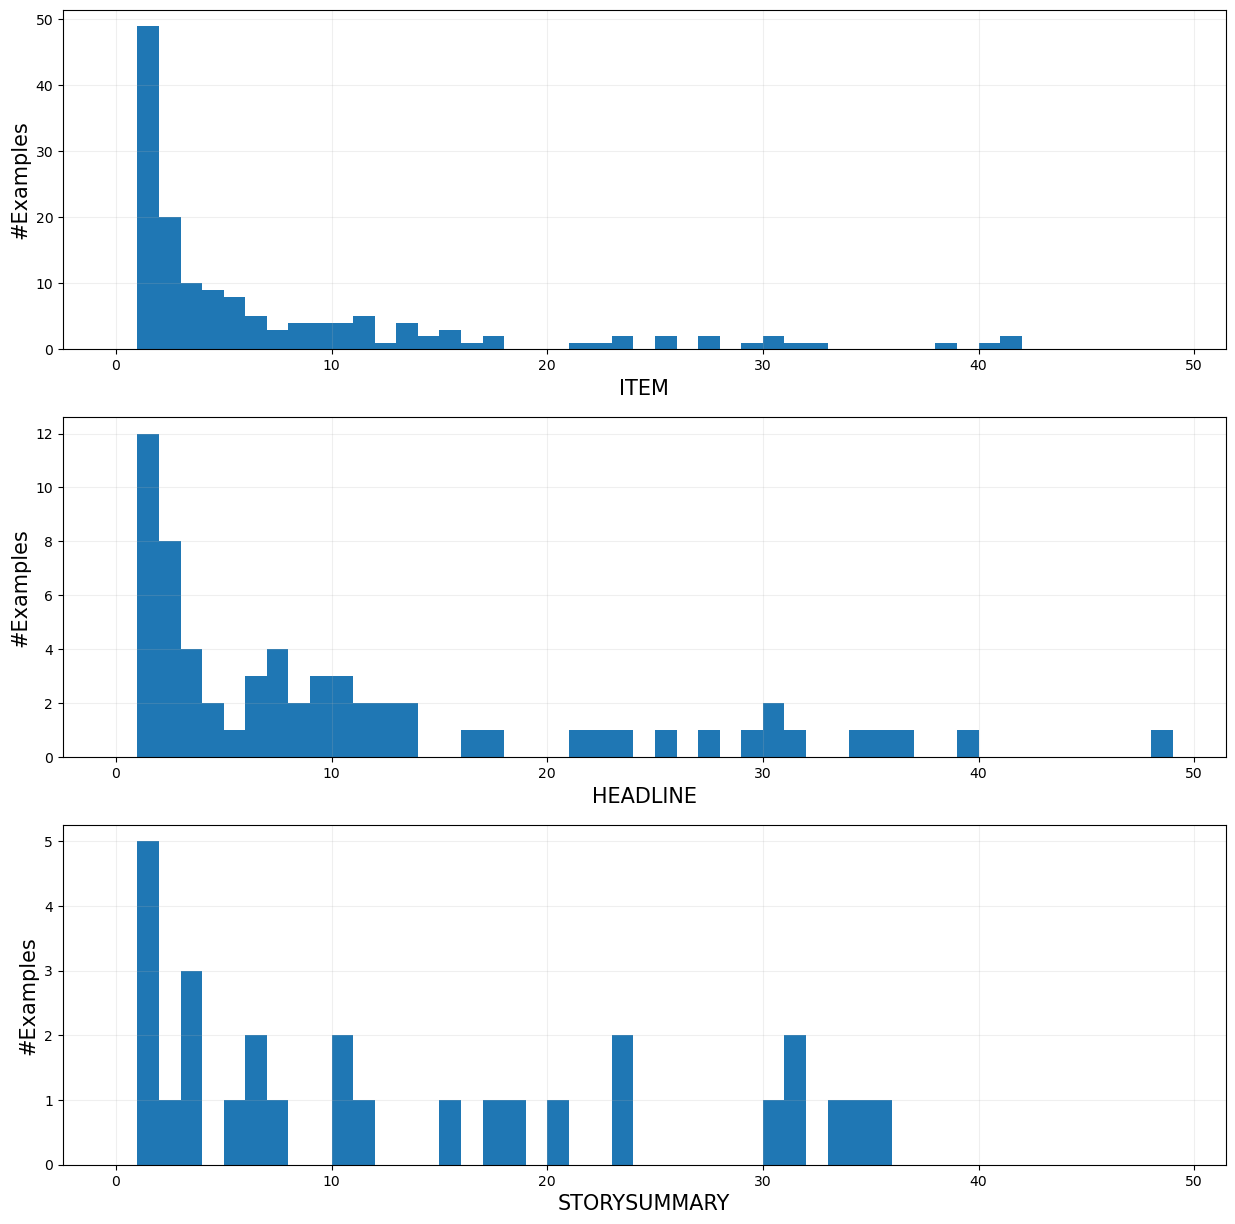

In [124]:
plt.figure(figsize=(15,15))
for ii, _single_key in enumerate(BIG_SET_KEYS):
    histogram_data = []
    
    sorted_keys = dict_key_set_data[_single_key].keys()
    
    for idx, _uniq_val in enumerate(sorted_keys):
        histogram_data.append(len(dict_key_set_data[_single_key][_uniq_val]))
    
    plt.subplot(3,1,ii+1)
    test = plt.hist(histogram_data, bins=range(50))
    plt.grid(which='major', alpha=0.2)

    plt.ylabel("#Examples", fontsize=15)
    plt.xlabel(_single_key.upper(), fontsize=15)
    
    print(f"{_single_key}: {sum(np.array(histogram_data)[np.where(np.array(histogram_data) < FILTER_BIG)])}")
    
plt.savefig(f'imgs/histogram_big_set_keys_filtered.pdf', bbox_inches='tight')

In [125]:
sum(np.array(histogram_data)[np.where(np.array(histogram_data) < FILTER_BIG)])

40

### Multi DIM

In [127]:
MULTI_DIM_KEYS = ['date', 'targetInterest', 'targetGeo']

VISUAL_KEY = KPI_KEY
#VISUAL_KEY = SECONDARY_KEYS[0]
VISUAL_KEY = SECONDARY_KEYS[1]
VISUAL_KEY

'engagements'

#### Date

In [128]:
# Get KEYs x KPI values
dict_key_set_data = {_single_key:{} for _single_key in MULTI_DIM_KEYS}

for _single_key in MULTI_DIM_KEYS:
    df_split = df[[_single_key, VISUAL_KEY]]
    
    for _uniq_val in dict_sets[_single_key]:
        #_query = f"{_single_key} == {_uniq_val}"
        #dict_key_set_data[_single_key][_uniq_val] = list(df_split.query(_query)[KPI_KEY])
        
        dict_key_set_data[_single_key][_uniq_val] = list(df_split[df_split[_single_key] == _uniq_val][VISUAL_KEY])

In [129]:
dict_key_set_data.keys()

dict_keys(['date', 'targetInterest', 'targetGeo'])

In [130]:
import datetime

def date_to_day(date):
    dt = datetime.datetime.strptime(date, '%Y-%m-%d')
    return datetime.datetime.weekday(dt)


In [131]:
dict_days = {idx:[] for idx in range(7)}

for date, values in dict_key_set_data['date'].items():
    dict_days[date_to_day(date)].extend(values)

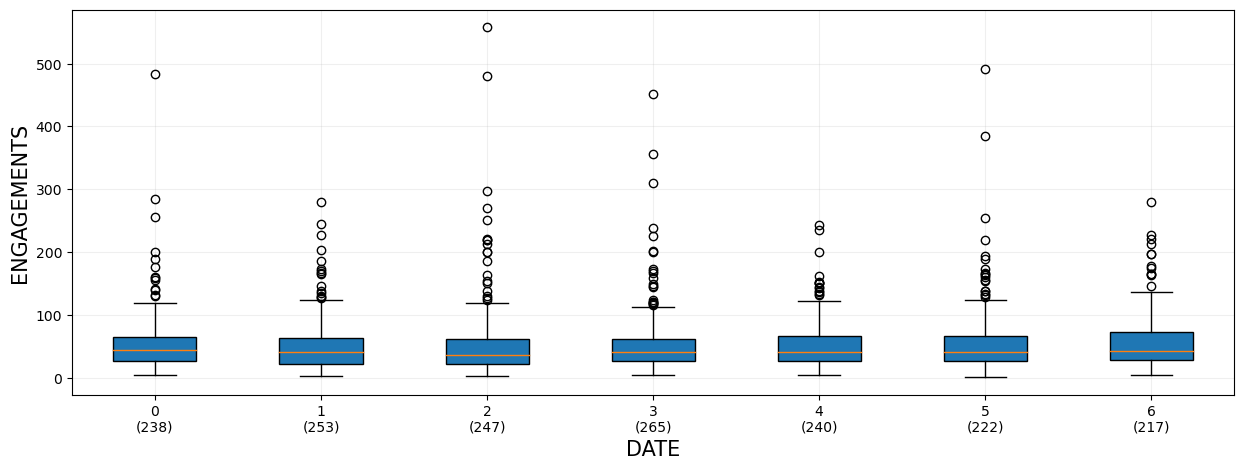

In [132]:
plt.figure(figsize=(15,5))

_single_key = 'date'
boxplot_data = []
labels = []

sorted_keys = dict_days.keys()

for idx, _uniq_val in enumerate(sorted_keys):
    boxplot_data.append(dict_days[_uniq_val])
    labels.append(f"{idx}\n({len(boxplot_data[-1])})")

test = plt.boxplot(boxplot_data, labels=labels, patch_artist=True)
plt.grid(which='major', alpha=0.2)

plt.ylabel(VISUAL_KEY.upper(), fontsize=15)
plt.xlabel(_single_key.upper(), fontsize=15)
    
plt.savefig(f'imgs/boxplot_{VISUAL_KEY}_{_single_key}.pdf', bbox_inches='tight')
#save_pickle(f'aux_data/dict_boxplot_{VISUAL_KEY}_data_big.pkl', dict_boxplot_data_big)

In [135]:
_key = "DATE" 
results = scipy.stats.tukey_hsd(boxplot_data[0],
                                boxplot_data[1],
                                boxplot_data[3],
                                boxplot_data[4],
                                boxplot_data[5],
                                boxplot_data[6])

print(f"{VISUAL_KEY} -> {_key.upper()}\n")
# print(results)
print("p-value > 0.05 all cases")

engagements -> DATE

p-value > 0.05 all cases


#### Target Interest 

In [136]:
_single_key = 'targetInterest'

dict_interest = {idx:[] for idx in range(len(dict_key_set_data[_single_key]))}

for idx, values in enumerate(dict_key_set_data[_single_key].values()):
    dict_interest[idx].extend(values)

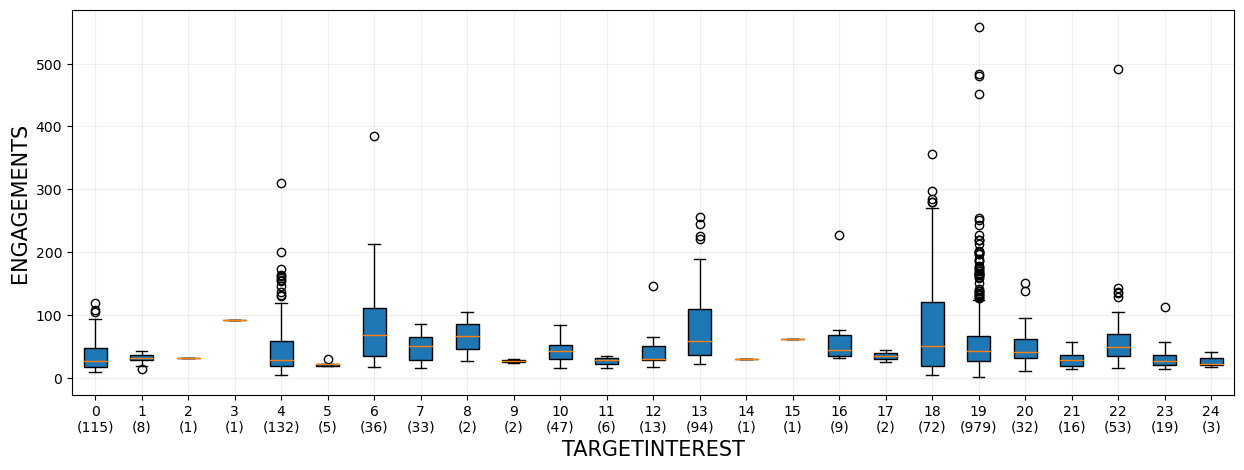

In [137]:
plt.figure(figsize=(15,5))

boxplot_data = []
labels = []

sorted_keys = dict_interest.keys()

for idx, _uniq_val in enumerate(sorted_keys):
    boxplot_data.append(dict_interest[_uniq_val])
    labels.append(f"{idx}\n({len(boxplot_data[-1])})")

test = plt.boxplot(boxplot_data, labels=labels, patch_artist=True)
plt.grid(which='major', alpha=0.2)

plt.ylabel(VISUAL_KEY.upper(), fontsize=15)
plt.xlabel(_single_key.upper(), fontsize=15)
    
plt.savefig(f'imgs/boxplot_{VISUAL_KEY}_{_single_key}.pdf', bbox_inches='tight')
#save_pickle(f'aux_data/dict_boxplot_{VISUAL_KEY}_data_big.pkl', dict_boxplot_data_big)

#### Target Geo

In [138]:
_single_key = 'targetGeo'

dict_interest = {idx:[] for idx in range(len(dict_key_set_data[_single_key]))}

for idx, values in enumerate(dict_key_set_data[_single_key].values()):
    dict_interest[idx].extend(values)

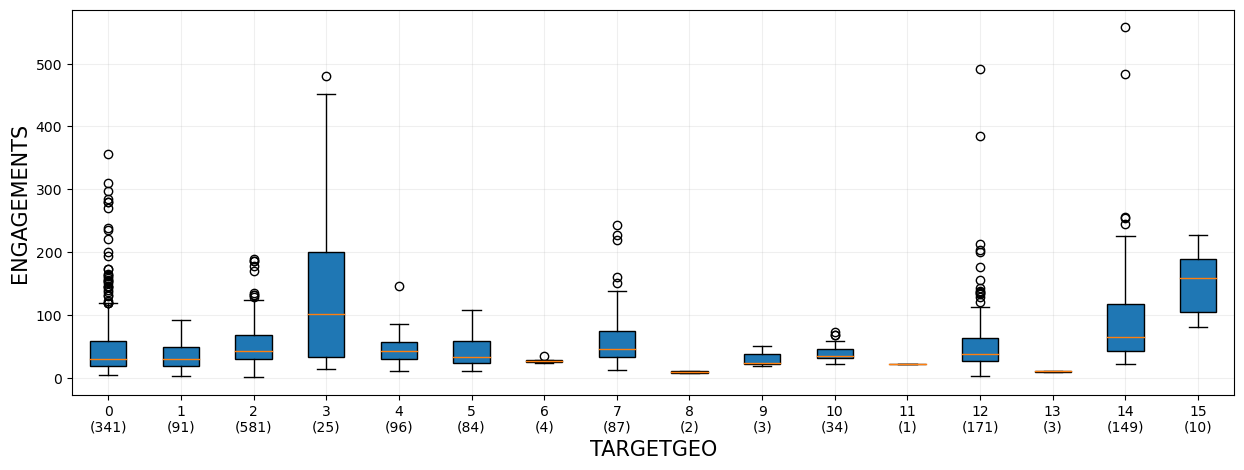

In [139]:
plt.figure(figsize=(15,5))

boxplot_data = []
labels = []

sorted_keys = dict_interest.keys()

for idx, _uniq_val in enumerate(sorted_keys):
    boxplot_data.append(dict_interest[_uniq_val])
    labels.append(f"{idx}\n({len(boxplot_data[-1])})")

test = plt.boxplot(boxplot_data, labels=labels, patch_artist=True)
plt.grid(which='major', alpha=0.2)

plt.ylabel(VISUAL_KEY.upper(), fontsize=15)
plt.xlabel(_single_key.upper(), fontsize=15)
    
plt.savefig(f'imgs/boxplot_{VISUAL_KEY}_{_single_key}.pdf', bbox_inches='tight')
#save_pickle(f'aux_data/dict_boxplot_{VISUAL_KEY}_data_big.pkl', dict_boxplot_data_big)

### Numeric Data

- Stats
- Corr()
- 3D Plots (Bid, Budget) -> Engagement, Media_Spend, CPE, PAGE_VIEWS, CLICK, Active_Days, Media_CPC

- Maybe see plots per IAB Category

In [140]:
df.describe()

,group,item,bid,budget,engagements,page_views,clicks,active_days,media_spend,media_cpc,cpe
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,49.879905,1052.561237,0.456941,137.875588,55.209869,131.042806,143.848395,56.795482,61.246843,0.478424,1.340462
std,7.580453,548.210311,0.207777,180.725259,49.443548,131.359557,140.945246,55.520905,52.971743,0.191657,0.851172
min,37.000000,12.000000,0.099762,5.842105,2.000000,24.000000,50.000000,1.000000,2.490000,0.030000,0.104409
25%,45.000000,673.750000,0.260000,68.399632,26.000000,58.000000,67.000000,12.000000,30.757500,0.342500,0.832027
50%,45.000000,1189.000000,0.500000,100.000000,42.000000,90.000000,98.000000,30.000000,46.880000,0.490000,1.111765
75%,53.000000,1511.000000,0.600000,147.577298,66.750000,149.000000,164.000000,105.750000,79.292500,0.607500,1.653750
max,83.000000,1836.000000,1.170000,2600.000000,558.000000,1552.000000,1634.000000,199.000000,707.810000,1.590000,7.547500


In [141]:
corr_matrix = df.corr()
corr_matrix

/var/folders/w6/r4rxn24d2ks46v67c652gp5m0000gn/T/ipykernel_53443/2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,group,item,bid,budget,engagements,page_views,clicks,active_days,media_spend,media_cpc,cpe
group,1.000000,-0.156195,-0.597943,-0.063460,-0.128774,-0.019083,-0.042082,-0.446599,-0.122693,-0.222673,-0.060342
item,-0.156195,1.000000,0.092478,0.057582,-0.027192,0.012446,0.027717,0.145645,-0.022186,-0.010527,0.076776
bid,-0.597943,0.092478,1.000000,-0.043527,-0.175969,-0.208361,-0.180346,0.484314,0.061918,0.522482,0.393056
budget,-0.063460,0.057582,-0.043527,1.000000,0.387971,0.416701,0.403504,-0.097804,0.576768,0.136895,0.060575
engagements,-0.128774,-0.027192,-0.175969,0.387971,1.000000,0.852871,0.854380,-0.069917,0.710924,-0.144768,-0.303374
page_views,-0.019083,0.012446,-0.208361,0.416701,0.852871,1.000000,0.994051,-0.124467,0.773575,-0.270589,-0.084076
clicks,-0.042082,0.027717,-0.180346,0.403504,0.854380,0.994051,1.000000,-0.091004,0.758542,-0.280346,-0.089252
active_days,-0.446599,0.145645,0.484314,-0.097804,-0.069917,-0.124467,-0.091004,1.000000,0.008888,0.170479,0.083004
media_spend,-0.122693,-0.022186,0.061918,0.576768,0.710924,0.773575,0.758542,0.008888,1.000000,0.237546,0.172618
media_cpc,-0.222673,-0.010527,0.522482,0.136895,-0.144768,-0.270589,-0.280346,0.170479,0.237546,1.000000,0.471283


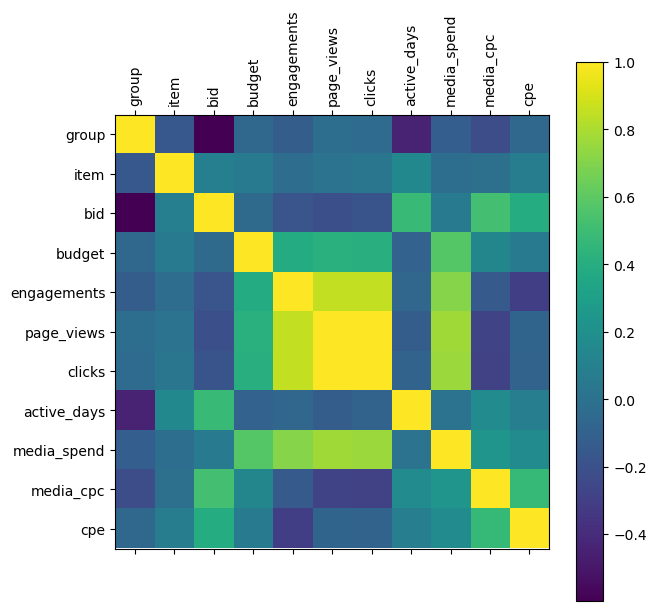

In [142]:
labels = list(corr_matrix['cpe'].keys())

fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.tick_params(axis="x", rotation=90)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

fig.colorbar(cax)

plt.savefig(f'imgs/corr_matrix_numeric_values.pdf', bbox_inches='tight')

In [143]:
corr_matrix['cpe'].sort_values(ascending=False)
# cpe x media_cpc: reasonable as media_cpc = spend / clicks (proxy to engagement)
# cpe x bid: when higher bid -> higher cpe ?
# cpe x media_spend and engagement: OK.

cpe            1.000000
media_cpc      0.471283
bid            0.393056
media_spend    0.172618
active_days    0.083004
item           0.076776
budget         0.060575
group         -0.060342
page_views    -0.084076
clicks        -0.089252
engagements   -0.303374
Name: cpe, dtype: float64

In [144]:
corr_matrix['engagements'].sort_values(ascending=False)
# engagements x clicks + page_views + media_spend: OK.
# engagements x budget: corr not so strong as previous cases
# engagements x bid: small uncorrelated dependency (!)

engagements    1.000000
clicks         0.854380
page_views     0.852871
media_spend    0.710924
budget         0.387971
item          -0.027192
active_days   -0.069917
group         -0.128774
media_cpc     -0.144768
bid           -0.175969
cpe           -0.303374
Name: engagements, dtype: float64

In [145]:
corr_matrix['media_spend'].sort_values(ascending=False)
# media_spend x media_cpc + page_views +  clicks + engagement + budget + cpe = OK

media_spend    1.000000
page_views     0.773575
clicks         0.758542
engagements    0.710924
budget         0.576768
media_cpc      0.237546
cpe            0.172618
bid            0.061918
active_days    0.008888
item          -0.022186
group         -0.122693
Name: media_spend, dtype: float64

/var/folders/w6/r4rxn24d2ks46v67c652gp5m0000gn/T/ipykernel_53443/3334681555.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_labels)


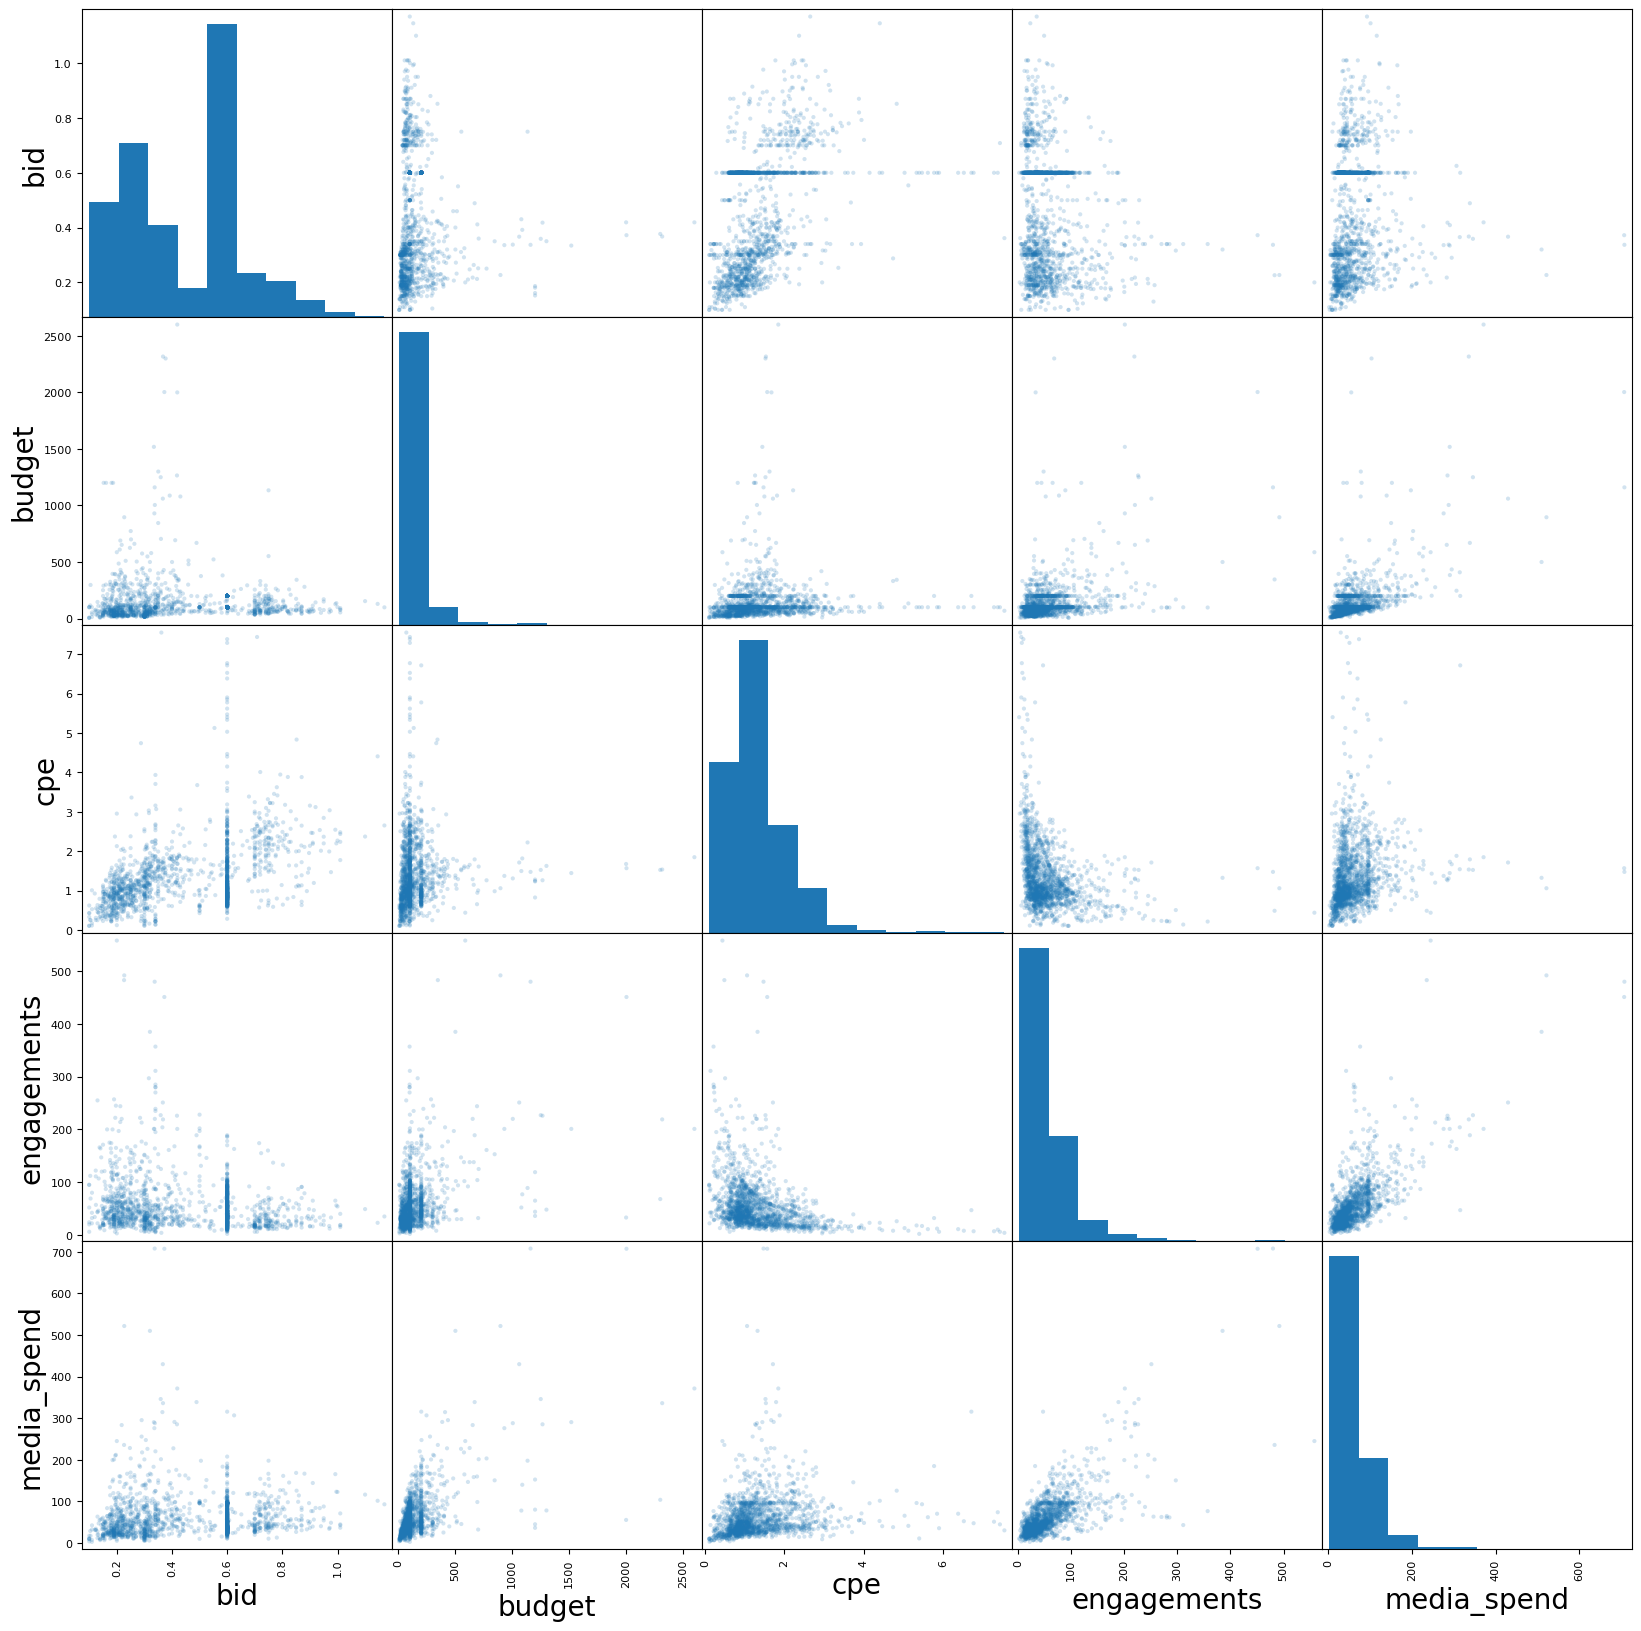

In [146]:
from pandas.plotting import scatter_matrix

FONT = 20
VALUE_KEYS = ['bid','budget','cpe', 'engagements','media_spend']

scatter_mat = scatter_matrix(df[VALUE_KEYS], figsize=(20,20), alpha=0.2)

for ax in scatter_mat.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = FONT, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = FONT, rotation = 90)

    try:
        new_labels = [round(float(i.get_text()), 2) for i in ax.get_yticklabels()]
        ax.set_yticklabels(new_labels)
    except:
        pass
    
plt.savefig(f'imgs/scatter_metrix_numeric_values.pdf', bbox_inches='tight')

#### 3D Bid x Budget

In [147]:
VALUE_KEYS = ['bid','budget','cpe', 'engagements','media_spend', 'page_views', 'clicks', 'media_cpc']

iab_cats = list(set(df["IABCategory"]))
MARKERS = ['^', '*', 'o', 's']

In [148]:
dict_values_per_cat = {_cat:{_key:[] for _key in VALUE_KEYS} for _cat in iab_cats}

for _cat in iab_cats:
    df_split = df[df['IABCategory'] == _cat]
    
    for _key in VALUE_KEYS:
        dict_values_per_cat[_cat][_key].extend(list(df_split[_key]))

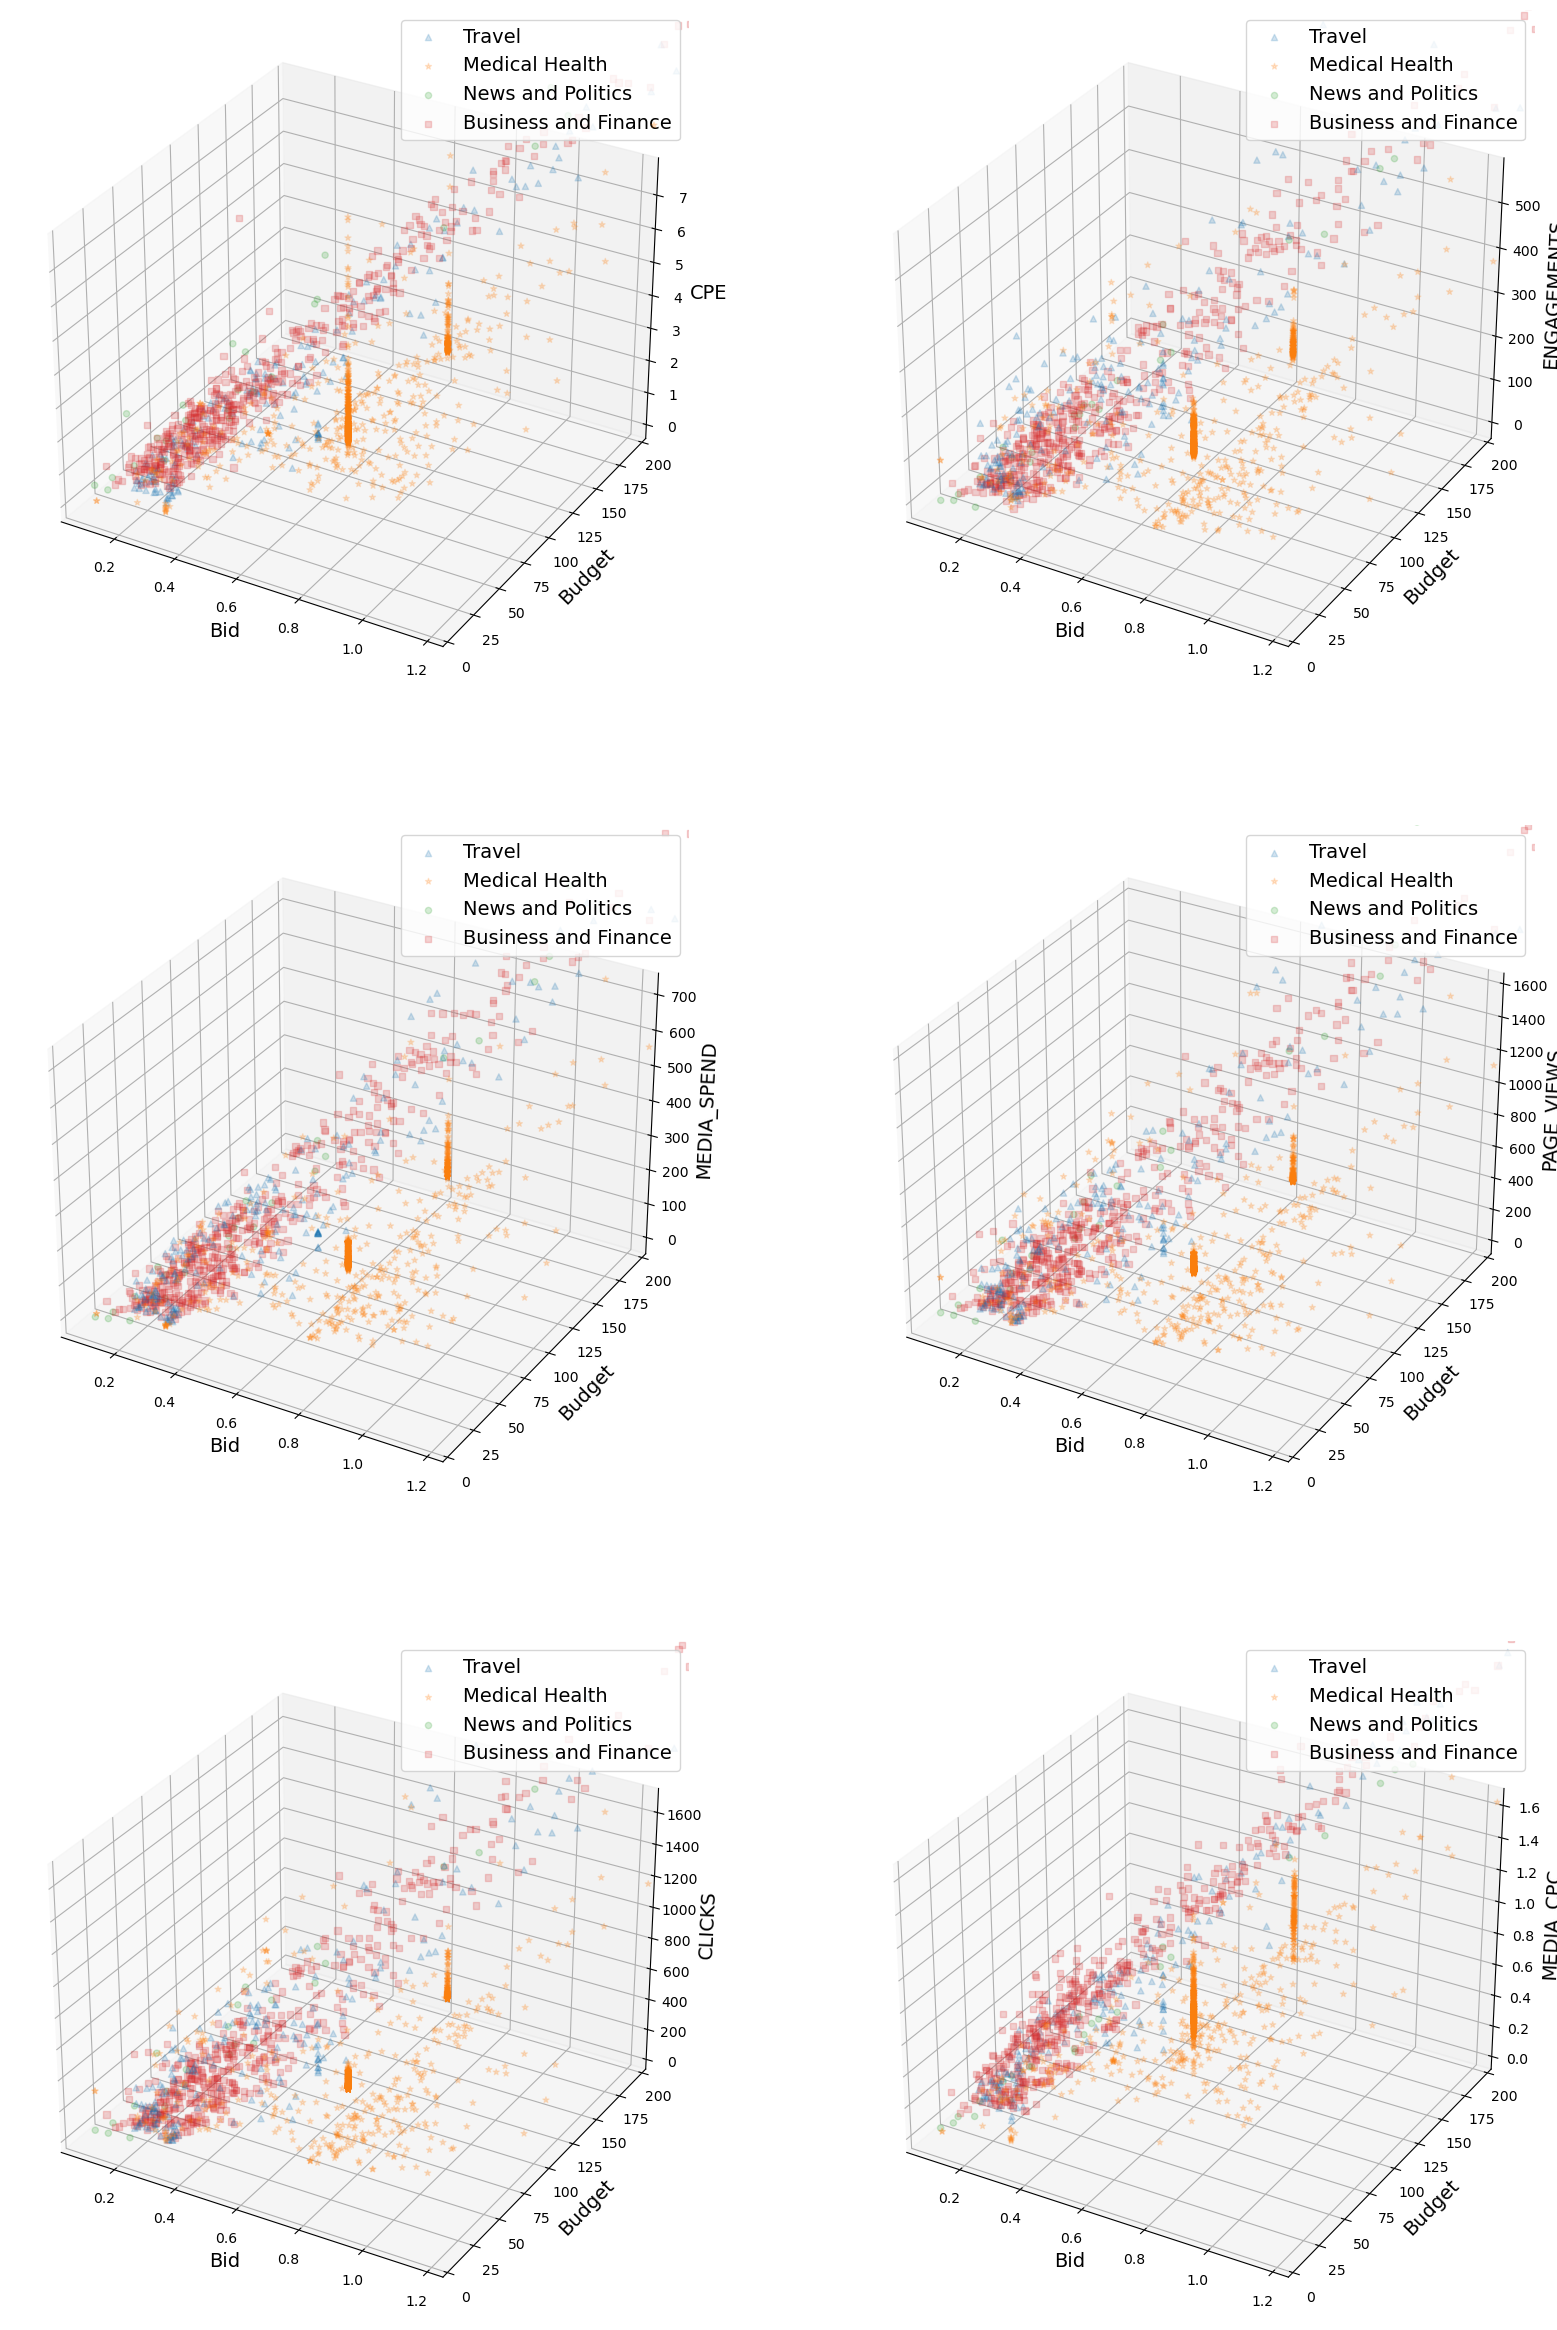

In [152]:
YMAX = 200
FONT = 14

fig = plt.figure(figsize=(20,30))
for idx, _key in enumerate(VALUE_KEYS[2:]):
    #plt.subplot(2,3,idx+1)
    #ax = subfig.add_subplot(projection='3d')
    ax = fig.add_subplot(3, 2, idx+1, projection='3d')
    
    for icat, _cat in enumerate(iab_cats):
        xs = dict_values_per_cat[_cat]['bid']
        ys = dict_values_per_cat[_cat]['budget']
        zs = dict_values_per_cat[_cat][_key]
        
        ax.scatter(xs, ys, zs, marker=MARKERS[icat], alpha=0.2)
        
        ax.set_xlabel('Bid',  fontsize=FONT)
        ax.set_ylabel('Budget',  fontsize=FONT)
        ax.set_zlabel(_key.upper(),  fontsize=FONT)
        
        ax.set_ylim([0, YMAX])
        
        ax.legend(iab_cats,loc="upper right", fontsize=FONT)

plt.savefig(f'imgs/scatter_numeric_values_ylim{YMAX}.pdf', bbox_inches='tight')

# Note: data quirks in clear bid x budget regions (!)